In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Giriş 

Veriyi analiz etmek için çeşitli yöntemler kullanılır. CRISP-DM (Cross-Industry Standard Process for Data Mining) veri madenciliği projeleri için yaygın olarak kullanılan bir süreç modelidir. Bu proje için de bu süreci öğrenmeye ve uygulamaya çalışacağım. 

<img src="https://miro.medium.com/1*djMbyEKpGQoD-c5LRssMYw.png" alt="Data Science" width="600"/>


### Verinin Anlaşılması

Bu bölümde verinin datafreame olarak alındıktan sonra 
- veri setinin genel yapısı incelenecek,
- eksik veriler kontrol edilecek,
- veri tipleri gözden geçirilecek,
- istatistiksel özetler çıkarılacak,
- veri görselleştirme teknikleri ile verinin dağılımı ve ilişkileri analiz edilecek.


In [14]:

dataframe = pd.read_csv('heart_disease_uci.csv')
print("-------------Veriseti hakkında-----------------")
print(dataframe.info())
print("-------------İstatistikler-----------------")
print(dataframe.describe())
print("-----------İlk beş veri-------------------")
dataframe.head()

-------------Veriseti hakkında-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
-------------İstatistikler-----------------
               id         age   

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Verisetinde hiç null değer yok. 14 field var, bunlardan num hedef değişken, diğerleri özellik değişkeni. 303 satır var. Bazı fieldlar kategorik, bazıları sayısal. Bir de ID field'ı var.Bunların önişleme aşamasında dikkate alınması gerekecek. 

Sütunların detayları şöyle : 

| Özellik                          | Count (Geçerli değer sayısı) | Ortalama (Mean) | Std (Standart sapma) | Min  | 25% | 50% (Median) | 75% | Max |
| -------------------------------- | ---------------------------- | --------------- | -------------------- | ---- | --- | ------------ | --- | --- |
| age                              | 920                          | 53.51           | 9.42                 | 28   | 47  | 54           | 60  | 77  |
| trestbps (dinlenik kan basıncı)  | 861                          | 132.13          | 19.07                | 0    | 120 | 130          | 140 | 200 |
| chol (kolesterol)                | 890                          | 199.13          | 110.78               | 0    | 175 | 223          | 268 | 603 |
| thalch (maksimum kalp atım hızı) | 865                          | 137.55          | 25.93                | 60   | 120 | 140          | 157 | 202 |
| oldpeak (ST depresyonu)          | 858                          | 0.88            | 1.09                 | -2.6 | 0.0 | 0.5          | 1.5 | 6.2 |


Şimdi veri görselleştirme ile veriyi daha iyi anlayalım.

C:\Users\Yasin\AppData\Local\Temp\ipykernel_4172\462776728.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num", data=dataframe, palette="Set2")


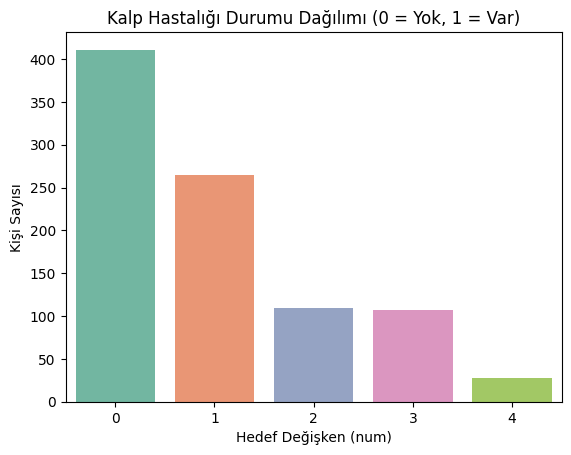

In [ ]:


sns.countplot(x="num", data=dataframe, palette="Set2")
plt.title("Kalp Hastalığı Durumu Dağılımı )")
plt.xlabel("Hedef Değişken (num)")
plt.ylabel("Kişi Sayısı")
plt.show()


Hedef değişken şöyleymiş : 

- `0 = no heart disease.`
- `1 = Mild Heart Disease types.`
- `2 = Moderate Heart Disease type.`
- `3 = Severe Heart Disease type.`
- `4 = Critical Heart Disease type.`

Buradan sonra veriyi anlamak için yapılacak anallzier şunlar olacak : 

- Cinsiyete göre kalp hastalığı dağılımı, 
- Yaş ve cinsiyet dağılımları ve normal dağılıma uygun mu incelenmesi 
- Atılması gereken field var mı kontrolü
- Outlier kontrolü (dağılımlar, boxplotlar)
- Özellikler arasındaki korelasyon analizi (ısı haritası)
- 